In [1]:
using CSV, DataFrames, Statistics, StatsPlots, ColorSchemes

In [2]:
# Read data from CSV file
df = CSV.read("series.csv", DataFrame, types=Dict())
rename!(df, Symbol.(strip.(string.(names(df)))))

# Extract x and y values from CSV data
xs = df.xs
ys1 = df.ys1
ys2 = df.ys2
ys3 = df.ys3

13-element Vector{Int64}:
    5
   14
   41
   98
  197
  350
  569
  866
 1253
 1742
 2345
 3074
 3941

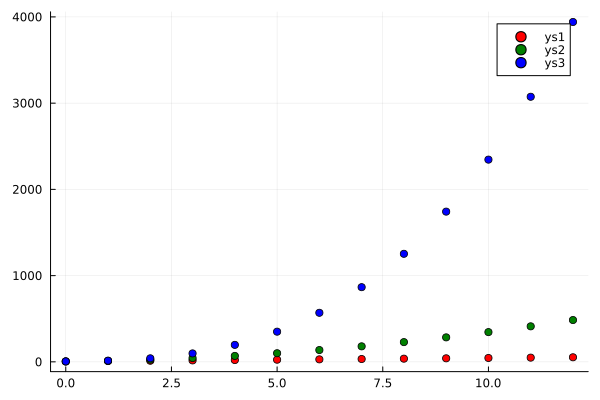

In [3]:
# Scatter plot with regression lines
scatter(
  xs, ys1, label="ys1", 
  seriestype=:scatter, color=:red, 
  legend=:topright)
scatter!(
  xs, ys2, label="ys2", 
  seriestype=:scatter, color=:green)
scatter!(
  xs, ys3, label="ys3", 
  seriestype=:scatter, color=:blue)

In [4]:
# Calculate standard error for each y series
se1 = std(ys1) / sqrt(length(ys1))
se2 = std(ys2) / sqrt(length(ys2))
se3 = std(ys3) / sqrt(length(ys3))

359.5684913893318

In [5]:
# Define color scheme for shading
colors = ColorSchemes.magma.colors

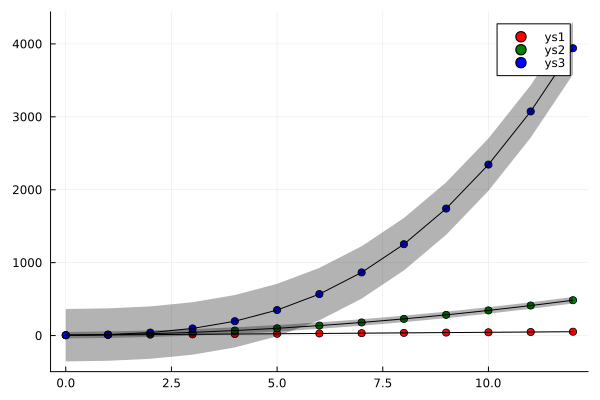

In [6]:
# Plot shaded region representing standard error
plot!(
  xs, ys1, label="", color=colors[1],
  ribbon=(se1, se1), fillalpha=0.3)
plot!(
  xs, ys2, label="", color=colors[2],
  ribbon=(se2, se2), fillalpha=0.3)
plot!(
  xs, ys3, label="", color=colors[3],
  ribbon=(se3, se3), fillalpha=0.3)

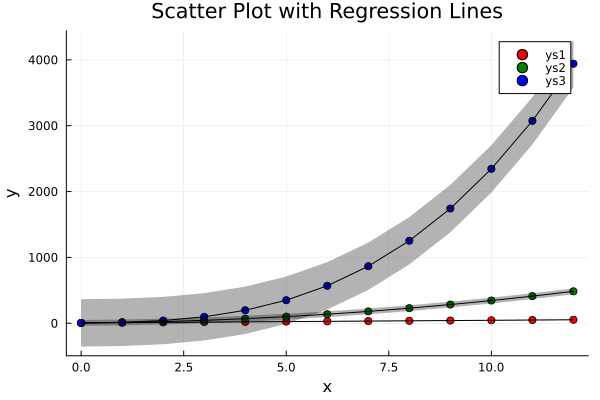

In [7]:
xlabel!("x")
ylabel!("y")
title!("Scatter Plot with Regression Lines")